In [80]:
import flickrapi

apiKey = u'1bcfbc296e564a1c96d4ab3b13bb253f'
apiSecret = u'28adfdc265ffa8b6'

def generate_data(api_key, api_secret, keywords, num):
    flickr = flickrapi.FlickrAPI(api_key, api_secret, format='parsed-json')
    photos = flickr.photos.search(tags=keywords, per_page=500, page=num)
    return photos

tags = ['people', 'expressions', 'face', 'faces', 'emotions', 'portrait']
flickr_data = []
for i in range(1,8):
    flickr_data.append(generate_data(apiKey, apiSecret, tags, i))
print(len(flickr_data))

7


### 1. Loading the data

In [81]:
import json
# print(flickr_data[0])
print(json.dumps(flickr_data[0], indent=2))

{
  "photos": {
    "page": 1,
    "pages": 190,
    "perpage": 500,
    "total": 94547,
    "photo": [
      {
        "id": "52554911250",
        "owner": "189360265@N04",
        "secret": "0840e8947c",
        "server": "65535",
        "farm": 66,
        "title": "Michael Aston (1985)",
        "ispublic": 1,
        "isfriend": 0,
        "isfamily": 0
      },
      {
        "id": "52554960893",
        "owner": "21608855@N03",
        "secret": "8cea84dbf2",
        "server": "65535",
        "farm": 66,
        "title": "Touch The Sky",
        "ispublic": 1,
        "isfriend": 0,
        "isfamily": 0
      },
      {
        "id": "52554713754",
        "owner": "133380475@N03",
        "secret": "62e35c15e8",
        "server": "65535",
        "farm": 66,
        "title": "20220916 - 20220916- Wedding Alexandra Oscar EP1 morning everyone PEN T&H - P9162227 - *L8 FLICK.jpg",
        "ispublic": 1,
        "isfriend": 0,
        "isfamily": 0
      },
      {
        "id"

In [82]:
import urllib.request
from PIL import Image

data = []
for i in range(0, len(flickr_data)):
    for img in flickr_data[i]['photos']['photo']:
        data.append(img)
print(len(data))

3500


In [84]:
train_data = data[:int(len(data)*0.7)]
test_data = data[int(len(data)*0.7):]

In [85]:
print(len(train_data))
print(len(test_data))

2450
1050


In [86]:
train_image_urls = []
train_text_data = []

for img in train_data:
    train_text_data.append(img['title'])
    url = "https://farm{farm_id}.staticflickr.com/{server_id}/{photo_id}_{secret_id}.jpg".format(
        farm_id = img['farm'], 
        server_id = img['server'], 
        photo_id = img['id'], 
        secret_id = img['secret']
    )
    train_image_urls.append(url)

In [87]:
print('The total number of images in train set: ', len(train_image_urls))
print('The number of corresponding text titles in train set: ', len(train_text_data))

The total number of images in train set:  2450
The number of corresponding text titles in train set:  2450


In [91]:
import requests
for i in range(0, len(train_image_urls)):
    image = Image.open(requests.get(train_image_urls[i], stream = True).raw)
    image.save("data/train_set/train_%d.jpg" % (i+1))
#     urllib.request.urlretrieve(train_image_urls[i], "data/train_set/train_%d.jpg" % (i+1))
#     image = Image.open("data/train_set/train_%d.jpg" % (i+1))
#     image = image.save(r"data/train_set/train_%d.jpg" % (i+1))

We repeat this process for our test set as well, saving into the directory we made for it.

In [92]:
test_image_urls = []
test_text_data = []

for img in test_data:
    test_text_data.append(img['title'])
    url = "https://farm{farm_id}.staticflickr.com/{server_id}/{photo_id}_{secret_id}.jpg".format(
        farm_id = img['farm'], 
        server_id = img['server'], 
        photo_id = img['id'], 
        secret_id = img['secret']
    )
    test_image_urls.append(url)

In [93]:
print('The total number of images in test set: ', len(test_image_urls))
print('The number of corresponding text titles in test set: ', len(test_text_data))

The total number of images in test set:  1050
The number of corresponding text titles in test set:  1050


In [94]:
for i in range(0, len(test_image_urls)):
#     print(test_image_urls[i])
    image = Image.open(requests.get(test_image_urls[i], stream = True).raw)
    image.save("data/test_set/test_%d.jpg" % (i+1))
#     urllib.request.urlretrieve(test_image_urls[i], "data/test_set/test_%d.jpg" % (i+1))
#     image = Image.open("data/test_set/test_%d.jpg" % (i+1))
#     image = image.save("data/test_set/test_%d.jpg" % (i+1))

### 2. Text processing

In [100]:
from nltk.probability import FreqDist
from nltk import word_tokenize

text = ' '.join(train_text_data)

# tokenize words
words = word_tokenize(text)

# compute word frequency
freq = FreqDist(words)

# show 100 most frequent words
freq.most_common(100)

[('XL', 921),
 ('POSTERS', 245),
 ('CAROLINA', 241),
 ('MARCONI', 241),
 ('BOOK', 192),
 (',', 176),
 ('EDIT', 175),
 ('3D', 175),
 ('Halloween', 131),
 ('Meetup', 131),
 ('Part', 131),
 ('SKY', 109),
 ('SPORTS', 109),
 ('I', 94),
 ('-', 88),
 ('MOBILE', 78),
 ('2022', 77),
 ('NASA', 70),
 ('Avatar', 58),
 ('Lensa', 58),
 ('App', 58),
 ('FLAGS', 48),
 ('Uke', 41),
 ('JEET', 40),
 ('KUNE', 40),
 ('DO', 40),
 ('II', 38),
 ('10/16', 38),
 ('LOGO', 37),
 ('.', 36),
 (')', 34),
 ('(', 33),
 ('Portrait', 33),
 ('&', 30),
 ('MARK', 30),
 ('ALIENS', 26),
 ('Alexandra', 24),
 ('20220916', 23),
 ('20220916-', 23),
 ('Wedding', 23),
 ('Oscar', 23),
 ('EP1', 23),
 ('morning', 23),
 ('everyone', 23),
 ('PEN', 23),
 ('T', 23),
 ('H', 23),
 ('*', 23),
 ('L8', 23),
 ('FLICK.jpg', 23),
 ('Stefania', 21),
 ('Visconti', 21),
 ('AVATAR', 18),
 ('PC/PS/XBOX', 18),
 ('the', 17),
 ('Ela', 17),
 ('UNIVERSO', 17),
 ('2000', 17),
 ('and', 16),
 ('of', 16),
 ('London', 16),
 ('in', 15),
 ('!', 15),
 ('NOT', 14),

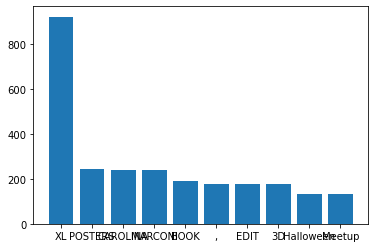

In [103]:
import matplotlib.pyplot as plt

freq_words = [i[0] for i in freq.most_common(10)]
counts = [i[1] for i in freq.most_common(10)]

plt.bar(freq_words, counts, align='center')
plt.show()